 ## Unsupervised Machine Learning - Clustering using K-Means
K-Means clustering is an unsupervised learning technique that is suitable for working with unlabelled data that lacks predefined categories or groups. The primary objective of this algorithm is to group similar data points together, with the number of groups determined by the value of K. The algorithm follows an iterated approach and assigns each data point to one of the K groups based on the features that are provided 

In [2]:
# Import required libraries

# Data Analysis
import pandas as pd
import numpy as np

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Machine learning and Evaluation
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score, homogeneity_score

import warnings
warnings.filterwarnings("ignore")

In [3]:
# load data
data = pd.read_csv(r"C:\Users\DAMILOLA\Desktop\Python\Selore Nig_Customer Segmentation(Unsupervised Machine Learning)\Customers - Customers.csv")
data.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
data.columns = ['CustomerID', 'Gender', 'Age', 'Annual_Income(k$)', 'Spending_Score']

In [9]:
data.head()

,CustomerID,Gender,Age,Annual_Income(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
data.shape

(200, 5)

In [11]:
len(data)

200

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         200 non-null    int64 
 1   Gender             200 non-null    object
 2   Age                200 non-null    int64 
 3   Annual_Income(k$)  200 non-null    int64 
 4   Spending_Score     200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [13]:
data.describe()

,CustomerID,Age,Annual_Income(k$),Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


CustomerID           0
Gender               0
Age                  0
Annual_Income(k$)    0
Spending_Score       0
dtype: int64


<Axes: >

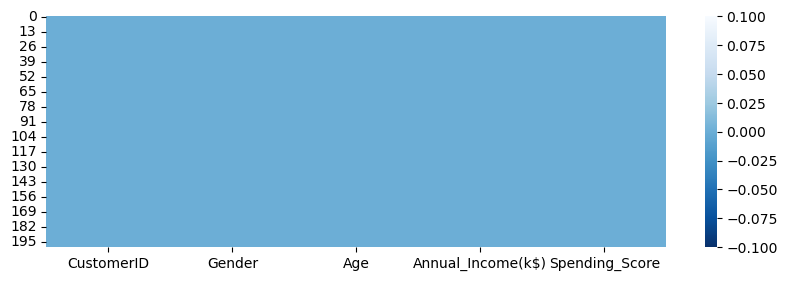

In [14]:
# Check f0r miissing values
print(data.isnull().sum())

# Visualizing the missing data
plt.figure(figsize=(10,3))
sns.heatmap(data.isnull(), cbar=True, cmap="Blues_r")

 ### Data Cleaning and Pre-Processing

In [15]:
# Check for duplicates
print(data.duplicated().sum())

0


### Exploratory Data Analysis

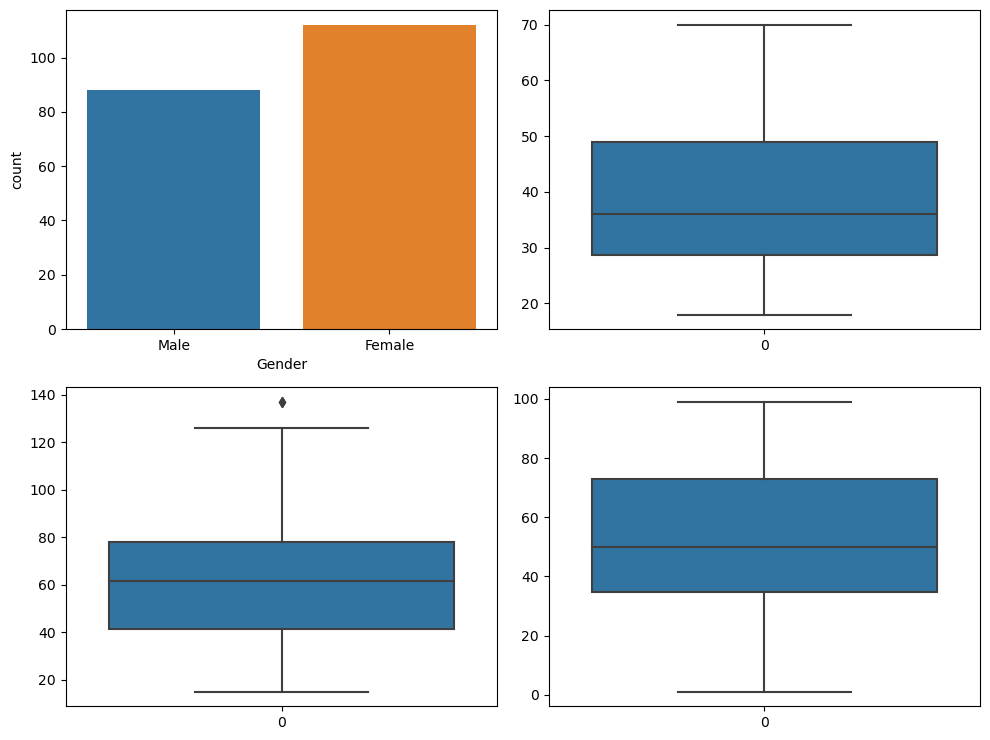

In [19]:
fig, axs = plt.subplots(2,2, figsize = (10,7.5))
plt1 = sns.countplot(x=data['Gender'], ax = axs[0,0])
plt2 = sns.boxplot(data['Age'], ax = axs[0,1])
plt2 = sns.boxplot(data['Annual_Income(k$)'], ax = axs[1,0])
plt2 = sns.boxplot(data['Spending_Score'], ax = axs[1,1])

plt.tight_layout()

### Narration:
- In terms of gender distribution, female customer tend to be higher than male customer.
- In terms of age, we can see from the visualization that the age range of the customers are between are between 28 to 50 years of age.
- In terms of annual income, we can say the customers are making an anuual income between the range of $40,000 to $80,000, but we can see a customer that exceeded the range of making almost $140,000.
- In terms of spending score, customers have a spending score that range between 35 to 80

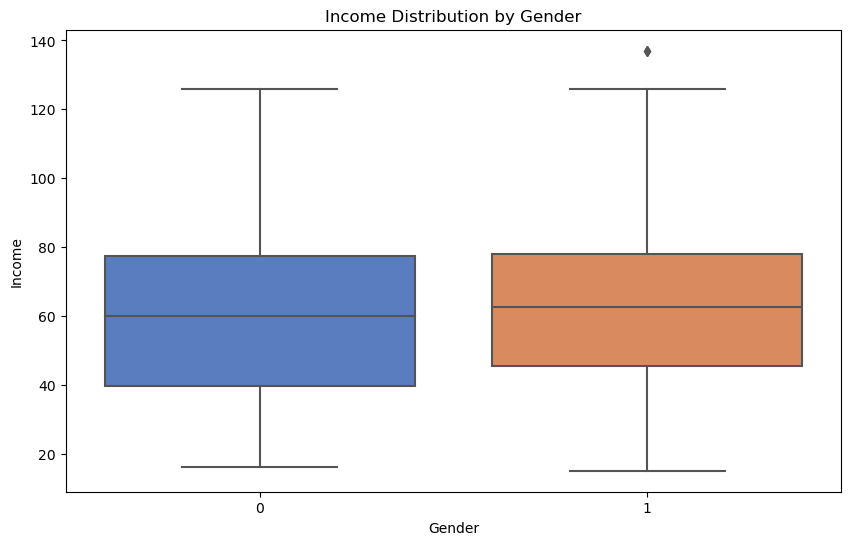

In [33]:
plt.figure(figsize=(10, 6))
sns. boxplot(x='Gender', y='Annual_Income(k$)', data=data, palette='muted')
plt.title('Income Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Income')
plt.show()

- In terms of income distribution by gender, we can say they have a balanced annual income range but, there is a female customer which are income exceed the range significantly

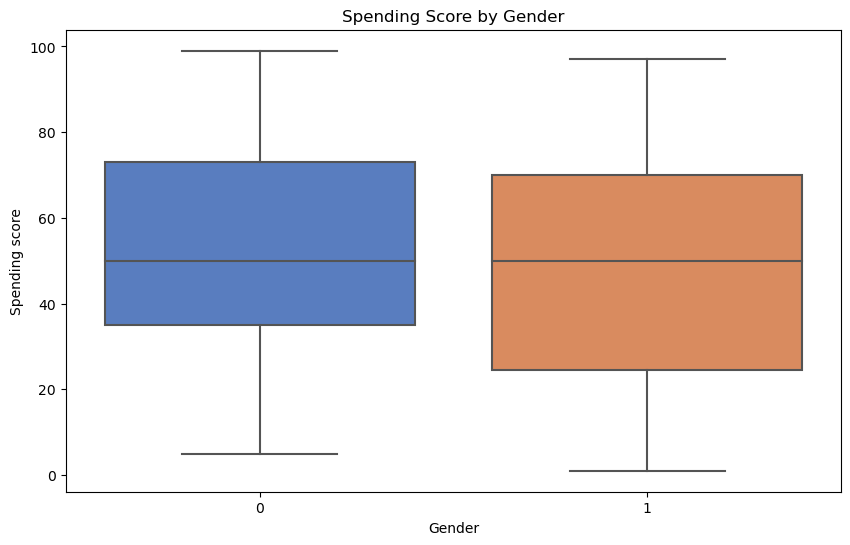

In [36]:
plt.figure(figsize=(10, 6))
sns. boxplot(x='Gender', y='Spending_Score', data=data, palette='muted')
plt.title('Spending Score by Gender')
plt.xlabel('Gender')
plt.ylabel('Spending score')
plt.show()

- In terms of spending score by gender, we can say the customer as a high spending score than the female customer but we can also see the female customer actually shop more in terms of spending score

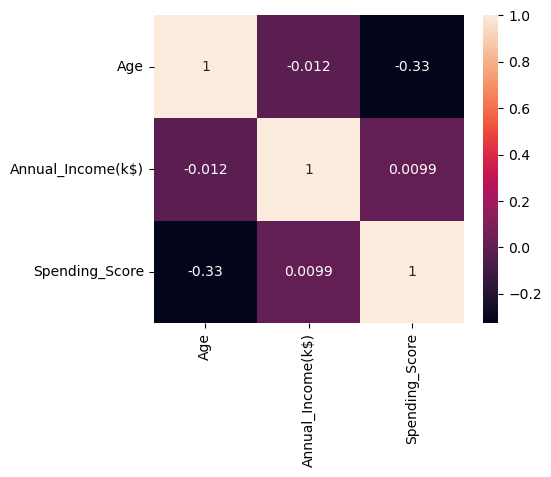

In [32]:
columns_check=data[['Age', 'Annual_Income(k$)', 'Spending_Score']]
plt.figure(figsize=(5,4))
correlation_table = columns_check.corr()
sns.heatmap(correlation_table, annot=True)
plt.show()

- In terms of correlation, Age and spending score has a low negative linear relationship

### Feature Engineering

In [39]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding
encoder = LabelEncoder() # method initialization

# Looping for columns except survived
for c in data.columns[1:]:
    if(data[c].dtype=='object'):
        data[c] = encoder.fit_transform(data[c])
    else:
        data[c] = data[c]

data.head()


,Gender,Age,Annual_Income(k$),Spending_Score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [41]:
data.head()

,Gender,Age,Annual_Income(k$),Spending_Score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


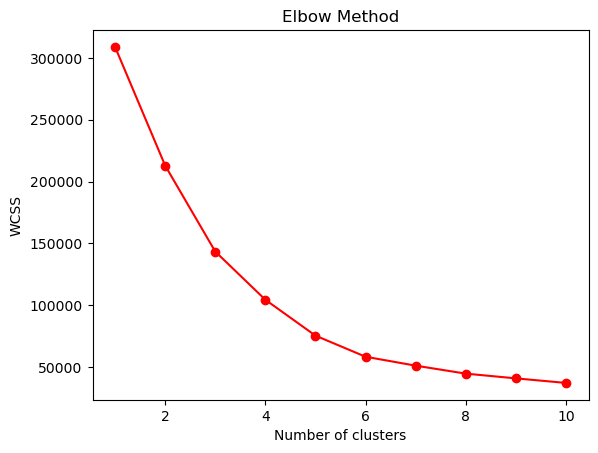

In [42]:
# Dtermine the optimal number of cluters
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss, color='red', marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In this code block, the objective is to determine the optimal number of clusters for the K-means clustering algorithm. The optimal number of clusters is important because it affects the quality of the clustering results.

The within-cluster sum of squares(WCSS) is used to determine the optimal number of clusters. WCSS measures the sum of the squared distance between each point and its corresponding cluster centroid. The idea is to minimize the WCSS by increasing the number of clusters until a certain point where the WCSS starts to decrease at a slower rate.

The foor loop iterate over a range of values from 0 to 10, creating a KMeans clustering model for each value of i. The 'init' parameter is set to 'K-means++' which is a method to initialize the centroids in a smart way to speed up convergence. The 'random_state' parameter is set to 42 for reproducibility. The 'fit' method is used to fit the KMeans model to the data, and the inertia (WCSS) is computed and appended to the 'wcss' list.

Finally, a plot is created with the number of clusters on the x-axis and the WCSS on the y-axis. The plot is called 'Elbow Method' plot because it looks like an elbow where the optimal number is the point where the WCSS starts to decrease at a slower rate. In this case, the plot shows that an optimal number of cluster is 5, as the WCSS starts to decrease at a slower rate beyond that point

In [43]:
# Fit K-means for clustering model
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans.fit(data)

# Add the cluster labels to data
data['cluster'] = kmeans.labels_

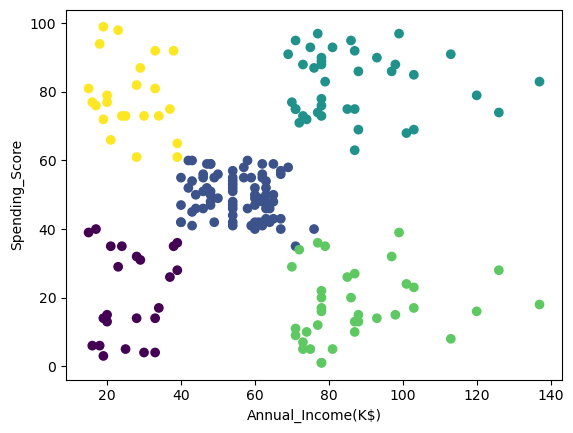

0.44473703994455477

In [54]:
# Visualize the cluster results
plt.scatter(data['Annual_Income(k$)'], data['Spending_Score'], c=data['cluster'],  label='Centroids')
plt.xlabel('Annual_Income(K$)')
plt.ylabel('Spending_Score')
plt.show()

# Calculate silhouette score
from sklearn.metrics import silhouette_score

silhouette_score(data, kmeans.labels_)

### Narration: The data(clusters) are plotted on a spending score Vs annual income curve.
Let us now analyze the results of the model:


Analyzing the Results
We can see that the retail company customers can be broadly grouped into 5 groups based on their purchases made in the store.

In cluster 1(purple colored) we can see people have low annual income and low spending scores, this is quite reasonable as people having low salaries prefer to buy less, in fact, these are the wise people who know how to spend and save money. The store will be least interested in people belonging to this cluster.

In cluster 2(yellow colored) we can see that people have low income but higher spending scores, these are those people who for some reason love to buy products more often even though they have a low income. Maybe it’s because these people are more than satisfied with the store services. The store might not target these people that effectively but still will not lose them.

In cluster 3(blue colored) we see that people have average income and an average spending score, these people again will not be the prime targets of the shops or mall, but again they will be considered and other data analysis techniques may be used to increase their spending score.

In cluster 4(mint-green colored) we see that people have high income and high spending scores, this is the ideal case for the store as these people are the prime sources of profit. These people might be the regular customers of the store and are convinced by the store's facilities.

In cluster 5(green colored) we see that people have high income but low spending scores, this is interesting. Maybe these are the people who are unsatisfied or unhappy by the mall’s services. These can be the prime targets of the store, as they have the potential to spend money. So, the store authorities will try to add new facilities so that they can attract these people and can meet their needs.

Finally, based on our machine learning technique we may deduce that to increase the profits of the store, the store authorities should target people belonging to cluster 3 and cluster 5 and should also maintain its standards to keep the people belonging to cluster 1 and cluster 2 happy and satisfied.
